<a href="https://colab.research.google.com/github/Chryron/CSC2516_NN-DL/blob/main/CSC2516_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **In this homework, you can only use numpy! No Pytorch, no mxnet, no "autograd" of any kind. You must compute gradients yourself and implement all optimizers yourself from scratch.**

# Problem 1 (3 points)

Consider the following function:
$$f(x, y) = x^2 + 10y^2$$
A [contour plot](https://en.wikipedia.org/wiki/Contour_line) of this function is shown below.

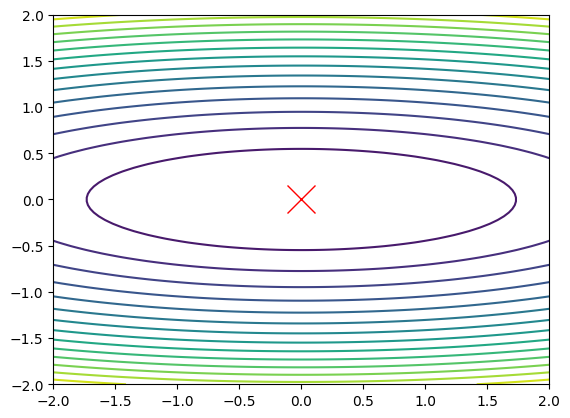

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, x**2 + 10*y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As you can see, the minimum is at (0, 0), and the curve is much steeper in the y direction than in the x direction.

1. Minimize this function using gradient descent. Use the initial point $x = 2, y = 1$. Find one learning rate where optimization diverges and one "good" learning rate that reaches the minimum in at most 20 iterations. For your solution, you should plot the steps taken by your optimizer on top of the contour plot. If you have an array `x` and another `y` which represent the x and y values followed over the course of minimization, you can plot them on top of the contor plot by doing
```Python
plot_contour()
plt.plot(x, y, '-')
```

1. Show (via derivation through calculus, not through coding) that minimizing this function using [Newton's Method](http://d2l.ai/chapter_optimization/gd.html#newton-s-method) will converge to the minimum in a single step.

1. Minimize this function using the momentum optimizer. Set the momentum hyperparameter to $0.9$. Can you find a learning rate that allows momentum to converge in less than 20 steps? Now, try optimizing for 100 steps. What is the largest and smallest learning rate you can use when optimizing for 100 steps and still converge near the minumum?

1. Implement the Adam optimizer. Use the standard values for all hyperparameters $\beta_1 = 0.9, \beta_2 = 0.999, \epsilon = 10^{-6}, \eta = 0.001$. How many steps does it take for Adam to converge with these hyperparameters? Now, change $\eta$ to the largest value you found that worked for Momentum with 100 steps. Does Adam converge in 100 steps with this value of $\eta$?

Gradient descent diverges for eta=0.34900000000000003 and converges within 20 steps for eta=0.08600000000000001


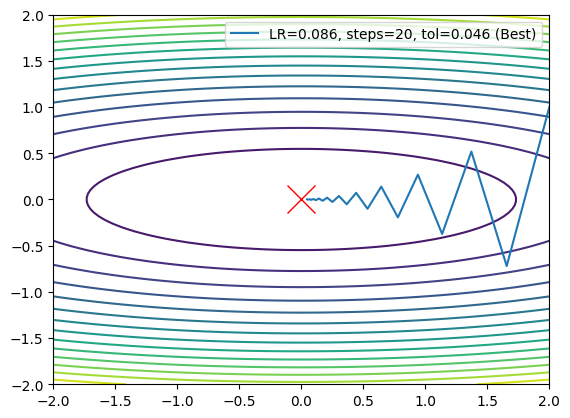

In [25]:
def function_to_minimise(x,y):
    return x*2 + 10*y**2

def gradient(x, y):
    dfdx = 2 * x
    dfdy = 20 * y
    return np.array([dfdx, dfdy])


def gradient_descent(eta, max_epochs = 20, x_init=2, y_init=1, tol=1e-4): 
    x, y = x_init, y_init
    X, Y = np.array(x), np.array(y)
    steps = np.inf
    path = [(x, y)]
    
    grad = gradient(x, y)
    grads=[grad]
    
    
    for i in range(max_epochs):
        # loop for max epochs and break if norm of gradient is close to 0
        if np.linalg.norm(grad)<tol:
            break
        x, y = np.array([x, y]) - eta * grad
        grad = gradient(x, y)
        path.append((x, y))
        grads.append(grad)
    
    return path, grads



# Test with a range of learning rates
learning_rates = np.arange(0.001, 0.35, 0.001)
best_convergence, divergence = np.inf, 0

for eta in learning_rates:
    path, grads = gradient_descent(eta)
 
    if np.linalg.norm(grads[-1])<best_convergence:
        best_convergence = np.linalg.norm(grads[-1])
        best_eta, best_path = eta, path
        best_steps = len(grads) - 1
    if np.linalg.norm(np.abs(grads[-1] - grads[-2])) > divergence:
        worst_eta, worst_path = eta, path
        divergence = np.linalg.norm(np.abs(grads[-1] - grads[-2]))
    


plot_contour()
X_best, Y_best = zip(*best_path)
X_worst, Y_worst = zip(*worst_path)
plt.plot(X_best, Y_best, '-', label=f'LR={round(best_eta,4)}, steps={round(best_steps,3)}, tol={round(np.linalg.norm(best_path[-1]),3)} (Best)')
plt.legend()
print(f"Gradient descent diverges for eta={worst_eta} and converges within 20 steps for eta={best_eta}")

Newton's method:
$$
\begin{align*}
\mathbf{x_{\text{new}}} &= \mathbf{x}_{\text{old}} - \frac{f'(\mathbf{x_{\text{old}}})}{f''(\mathbf{x_{\text{old}}})} \\ 
&=\mathbf{x}_{\text{old}} - \mathbf{H}^{-1}(\mathbf{x}_{\text{old}})f'(\mathbf{x_{\text{old}}})
\end{align*}
$$

$$
\mathbf{H} = \begin{bmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy}
\end{bmatrix}
$$
For our function $f(x, y) = x^2 + 10y^2$:
$$
\begin{align*}
f_{xx} &= \frac{\partial^2 f}{\partial x^2} = 2 \\  
f_{yy} &= \frac{\partial^2 f}{\partial y^2} = 20 \\ 
f_{xy} = f_{yx} &= \frac{\partial^2 f}{\partial x \partial y} = 0
\end{align*}
$$
Thus, the Hessian matrix for our function is:
$$
\mathbf{H} = \begin{bmatrix}
2 & 0 \\
0 & 20
\end{bmatrix}
$$
The gradient for our function is:
$$
\nabla f(2, 1) = \begin{bmatrix} 2x \\ 20y \end{bmatrix}= \begin{bmatrix} 4 \\ 20 \end{bmatrix}
$$
Therefore, applying Newton's method:
$$
\begin{align*}
\begin{bmatrix} x_{\text{new}} \\ y_{\text{new}} \end{bmatrix} &= \begin{bmatrix} x_{\text{old}} \\ y_{\text{old}} \end{bmatrix} - \mathbf{H}^{-1} \nabla f(x_{\text{old}}, y_{\text{old}}) \\ 
&= \begin{bmatrix} 2 \\ 1 \end{bmatrix} - \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{20} \end{bmatrix} \begin{bmatrix} 4 \\ 20 \end{bmatrix} \\ 
&= \begin{bmatrix} 2 \\ 1 \end{bmatrix} - \begin{bmatrix} 2 \\ 1 \end{bmatrix} \\ 
&= \begin{bmatrix} 0 \\ 0 \end{bmatrix} 
\end{align*}
$$
i.e., applying Newton's method leads to convergence in a single step

Momentum leads to convergence within 20 steps for eta=0.07


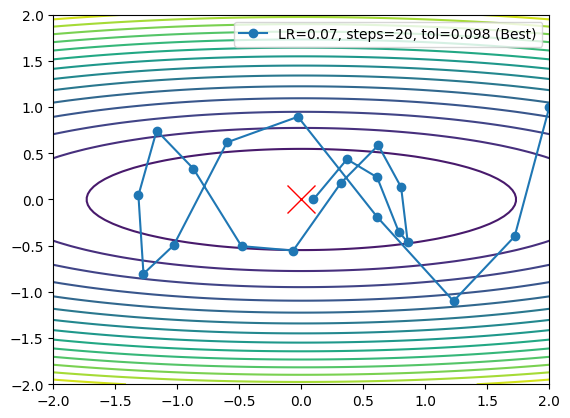

In [27]:
def momentum_optimizer(eta, beta=0.9, max_epochs=20, x_init=2, y_init=1, tol=1e-4):
    momentum = np.array([0,0]) # initialize momentum
    x, y = x_init, y_init
    path = [(x, y)]
    grad = gradient(x, y)
    grads=[grad]
    
    for epoch in range(max_epochs):
        
        if np.linalg.norm(grad)<tol:
            break
        momentum = beta * momentum +  grad
        x, y = np.array([x, y]) - eta * momentum
        grad = gradient(x,y)
        path.append((x, y))
        grads.append(grad)
        pass
    return path, grads

# Test with a range of learning rates
learning_rates = np.arange(0.001, 0.35, 0.001)
best_convergence = np.inf

for eta in learning_rates:
    path, grads = momentum_optimizer(eta)
    if np.linalg.norm(grads[-1])<best_convergence:
        best_convergence = np.linalg.norm(grads[-1])
        best_eta, best_path = eta, path
        best_steps = len(grads) - 1

plot_contour()
X_best, Y_best = zip(*best_path)
plt.plot(X_best, Y_best, '-o', label=f'LR={round(best_eta,4)}, steps={round(best_steps,3)}, tol={round(np.linalg.norm(best_path[-1]),3)} (Best)')
plt.legend()
print(f"Momentum leads to convergence within 20 steps for eta={best_eta}")



Optimizing for 100 steps leads to the smallest eta that converges being 0.012 with a 96 steps


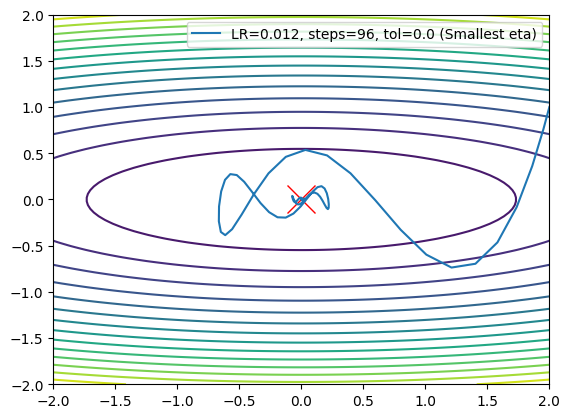

In [32]:
smallest_eta, largest_eta = np.inf, 0
tol = 1e-2 
learning_rates = np.arange(0.001, 0.35, 0.001)
for eta in learning_rates:
    path, grads = momentum_optimizer(eta, max_epochs=100, tol=tol)
    if np.linalg.norm(grads[-1])<tol:
        if eta<smallest_eta:
            smallest_eta, smallest_path = eta, path
            smallest_eta_steps = len(grads) - 1
            smallest_convergence = np.linalg.norm(path[-1])
        if eta>largest_eta:
            largest_eta, largest_path = eta, path
            largest_eta_steps = len(grads) - 1
            largest_convergence = np.linalg.norm(path[-1])

plot_contour()
X_smallest, Y_smallest = zip(*smallest_path)
X_largest, Y_largest = zip(*largest_path)
plt.plot(X_smallest, Y_smallest, '-', label=f'LR={round(smallest_eta,4)}, steps={round(smallest_eta_steps,3)}, tol={round(smallest_convergence,3)} (Smallest eta)')
plt.legend()
print(f"Optimizing for 100 steps leads to the smallest eta that converges being {round(smallest_eta,5)} with a {smallest_eta_steps} steps")



Optimizing for 100 steps leads to the largest eta that converges being 0.165 with a 97 steps


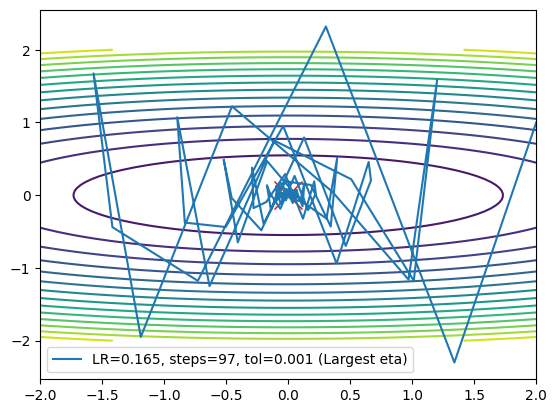

In [33]:
plot_contour()
plt.plot(X_largest, Y_largest, '-', label=f'LR={round(largest_eta,4)}, steps={round(largest_eta_steps,3)}, tol={round(largest_convergence,3)} (Largest eta)')
plt.legend()
print(f"Optimizing for 100 steps leads to the largest eta that converges being {round(largest_eta,5)} with a {largest_eta_steps} steps")


Number of steps for ADAM to converge with standard parameter values = 4389


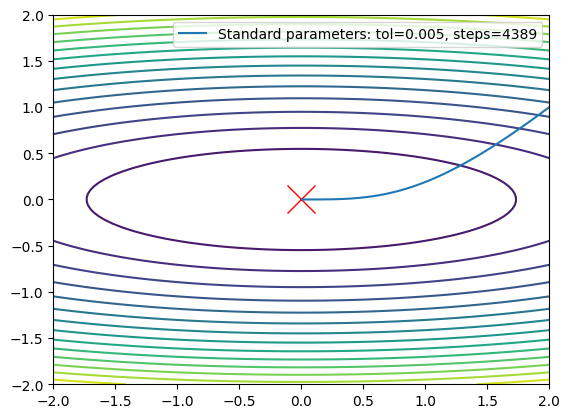

In [34]:
def adam_optimizer(max_epochs=10000, beta_1=0.9, beta_2=0.999, epsilon=1e-6, eta=0.001, x_init=2,y_init=1,tol=1e-2):
    x,y = x_init, y_init
    path = [(x,y)]
    grads = []
    momentum, second_moment = 0,0
    for epoch in range(max_epochs):
        grad = gradient(x,y)
        grads.append(grad)
        if np.linalg.norm(grad)<tol:
            break
        momentum = beta_1 * momentum +  (1-beta_1) * grad
        second_moment = beta_2 * second_moment +  (1-beta_2) * grad**2
        momentum_norm = momentum/(1-beta_1**(epoch+1))
        second_moment_norm = second_moment/(1-beta_2**(epoch+1))
        x, y = np.array([x,y]) - (eta*momentum_norm)/(np.sqrt(second_moment_norm)+epsilon)
        path.append((x,y))
    return path, grads

path, grads = adam_optimizer()
print(f"Number of steps for ADAM to converge with standard parameter values = {len(grads)}")
X, Y = zip(*path)

plot_contour()
plt.plot(X, Y, '-', label=f'Standard parameters: tol={round(np.linalg.norm(path[-1]),3)}, steps={len(grads)}')
plt.legend()


Number of steps for ADAM to converge with largest momentum eta = 117


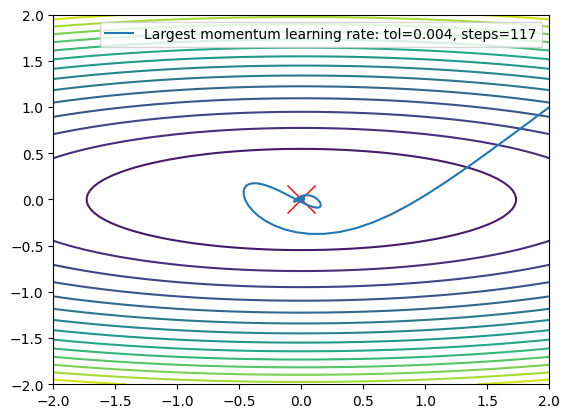

In [35]:
path, grads = adam_optimizer(eta=largest_eta)
print(f"Number of steps for ADAM to converge with largest momentum eta = {len(grads)}")
X, Y = zip(*path)

plot_contour()
plt.plot(X, Y, '-', label=f'Largest momentum learning rate: tol={round(np.linalg.norm(path[-1]),3)}, steps={len(grads)}')
plt.legend()

# Problem 2 (2 points)

Now, consider minimization of the ["three-hump camel function"](https://www.sfu.ca/~ssurjano/camel3.html):

$$f(x, y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

This function also has a minimum at $(0, 0)$. Below is a contour plot.

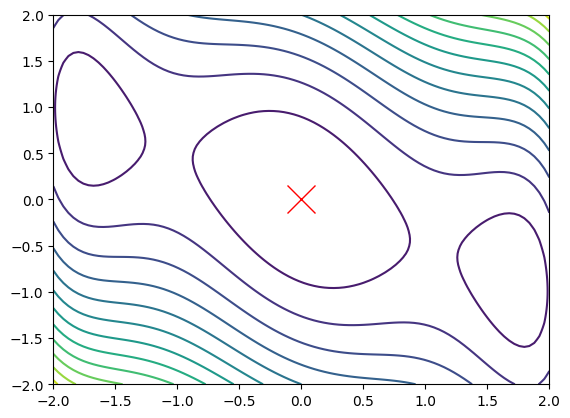

In [36]:
def plot_contour():
    x, y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
    plt.contour(x, y, 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2, levels=15)
    plt.plot(0, 0, 'rx', ms=20)
plot_contour()

As in the first problem, assume that optimization starts from $x = 2, y = 1$. Try minimizing it with SGD, Adam, and Momentum, while only changing the learning rate for each (not the momentum or other hyperparameters). Try to find an optimizer and learning rate that can reach the **global** minimum in as few steps as possible.

/var/folders/tf/mttkb7w11fdgptthdrs4rk2c0000gn/T/ipykernel_1792/566576040.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.array([4*x - 4.2*x**3 + x**5 + y, x+2*y])
/var/folders/tf/mttkb7w11fdgptthdrs4rk2c0000gn/T/ipykernel_1792/566576040.py:2: RuntimeWarning: invalid value encountered in scalar add
  return np.array([4*x - 4.2*x**3 + x**5 + y, x+2*y])
/var/folders/tf/mttkb7w11fdgptthdrs4rk2c0000gn/T/ipykernel_1792/566576040.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return np.array([4*x - 4.2*x**3 + x**5 + y, x+2*y])


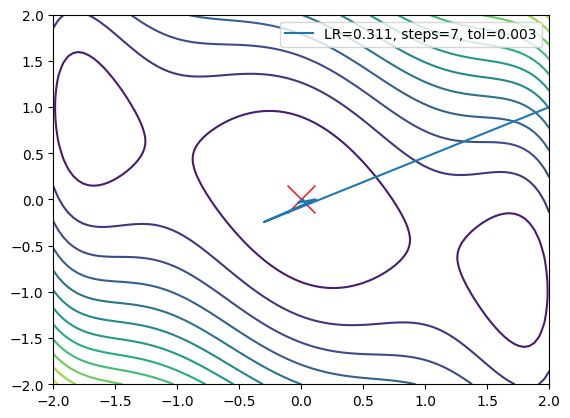

In [40]:
def gradient(x,y):
    return np.array([4*x - 4.2*x**3 + x**5 + y, x+2*y])

learning_rates = np.arange(0.001, 0.35, 0.001)
max_epochs, tol = 6000, 1e-2
sgd_steps, mom_steps, adam_steps = np.inf, np.inf, np.inf

for eta in learning_rates:
    path, grads = gradient_descent(eta, max_epochs = max_epochs, tol=tol)
    if len(grads)-1<sgd_steps and np.linalg.norm(path[-1])<1e-1:
        best_sgd_eta, best_sgd_path = eta, path
        sgd_steps = len(grads)
    path, grads = momentum_optimizer(eta, max_epochs = max_epochs, tol=tol)
    if len(grads)-1<mom_steps and np.linalg.norm(path[-1])<1e-1:
        best_mom_eta, best_mom_path = eta, path
        mom_steps = len(grads)
    path, grads = adam_optimizer(eta=eta, max_epochs = max_epochs, tol=tol)
    if len(grads)-1<adam_steps and np.linalg.norm(path[-1])<1e-1:
        best_adam_eta, best_adam_path = eta, path
        adam_steps = len(grads)
    


plot_contour()
X_sgd, Y_sgd = zip(*best_sgd_path)
X_mom, Y_mom = zip(*best_mom_path)
X_adam, Y_adam = zip(*best_adam_path)
plt.plot(X_sgd, Y_sgd, '-', label=f'LR={round(best_sgd_eta,4)}, steps={sgd_steps}, tol={round(np.linalg.norm(best_sgd_path[-1]),3)}')
plt.legend()


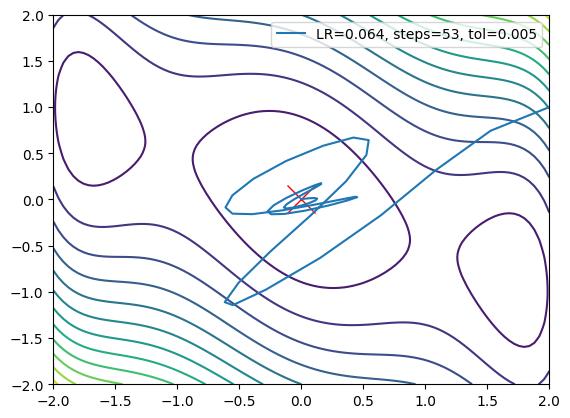

In [41]:
plot_contour()
plt.plot(X_mom, Y_mom, '-', label=f'LR={round(best_mom_eta,4)}, steps={mom_steps}, tol={round(np.linalg.norm(best_mom_path[-1]),3)}')
plt.legend()

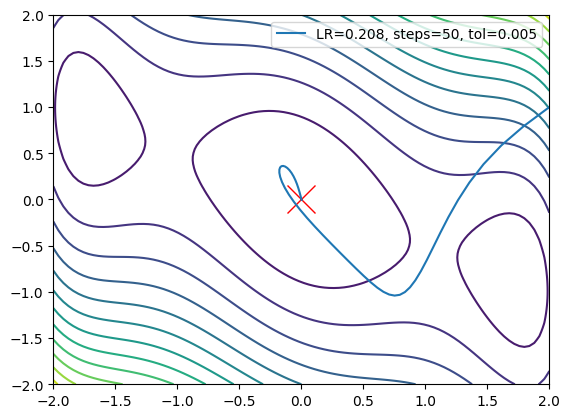

In [42]:
plot_contour()
plt.plot(X_adam, Y_adam, '-', label=f'LR={round(best_adam_eta,4)}, steps={adam_steps}, tol={round(np.linalg.norm(best_adam_path[-1]),3)}')
plt.legend()

SGD with LR=0.311 is best

Collaborators:
- Karen Liu (karenq.liu@mail.utoronto.ca)